In [1]:
import numpy as np


In [2]:
A = np.loadtxt("biofilm.txt", comments = '%')

In [3]:
X = A[:,0].reshape(1000,1000)
Y = A[:,1].reshape(1000,1000)
phipf = A[:,2].reshape(1000,1000)

In [4]:
import matplotlib.pyplot as plt
#plt.imshow(phipf)

bx = []
by = []
for i in range(1000):
    for j in range(1000):
        if (phipf[i,j] < 0.05 ) and (phipf[i,j] > -0.1):
            bx.append(X[i,j])
            by.append(Y[i,j])


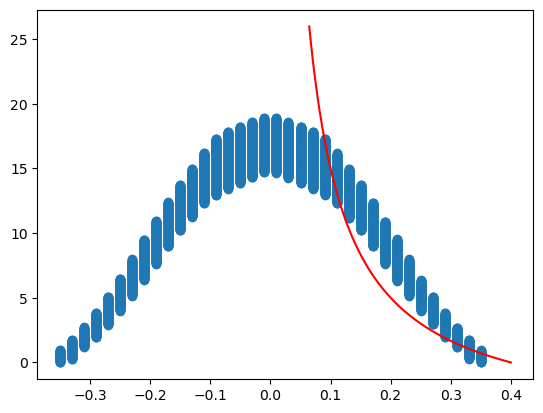

In [5]:
plt.scatter(bx, by)
s = np.arange(1000)*0.026
plt.plot(2.0 / (5 + s), s,'r')

In [6]:
def reader2(A, T):
    ndots, nvalues = np.shape(A)
    xlab = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    ylab = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    sxx = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    sxy = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    syy = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    u = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)
    v = np.zeros(ndots * (T + 2)).reshape(ndots, T+2)

    xlab[:,0] = A[:, 0]
    ylab[:,0] = A[:, 0]
    sxx[:,0] = A[:, 0]
    sxy[:,0] = A[:, 0]
    syy[:,0] = A[:, 0]
    u[:,0] = A[:, 0]
    v[:,0] = A[:, 0]

    xlab[:,1] = A[:, 1]
    ylab[:,1] = A[:, 1]
    sxx[:,1] = A[:, 1]
    sxy[:,1] = A[:, 1]
    syy[:,1] = A[:, 1]
    u[:,1] = A[:, 1]
    v[:,1] = A[:, 1]

    for i in range(T):
        xlab[:,i+2] = A[:, 2 + i*7]
        ylab[:,i+2] = A[:, 3 + i*7]
        sxx[:,i+2] = A[:, 4 + i*7]
        sxy[:,i+2] = A[:, 5 + i*7]
        syy[:,i+2] = A[:, 6 + i*7]
        u[:,i+2] = A[:, 7 + i*7]
        v[:,i+2] = A[:, 8 + i*7]
    
    return xlab, ylab, sxx, sxy, syy, u, v



def string_sep(line):
    A = []
    a = ''
    for c in line:
        if (c == ','):
            A.append(a)
            a = ''
        else:
            a += c
    A.append(a)
    res = []
    for a in A:
        res.append(float(a))
    return res
        
def string_sep2(line):
    A = []
    a = ''
    for c in line:
        if (c == '\t'):
            A.append(a)
            a = ''
        else:
            a += c
    A.append(a)
    res = []
    for a in A:
        res.append(float(a))
    return res
        
def reader(filename):
    Res = []
    with open(filename) as f:
        for line in f:
            if (line[0] == '%'):
                pass
            else:
                res = string_sep2(line)
                Res.append(res)
    R = np.array(Res)
    return R
 
def boundary(R,threshold):
    X = []
    Y = []

    for i in range(len(R[:,2])):
        r = R[i,2]
        if (abs(r) < threshold):
            #print(r)
            X.append(R[i,0] )
            Y.append(R[i,1])
    '''
    N = len(X)
    b = np.zeros(2*N).reshape(2,N)
    b[0,:] = X
    b[1,:] = Y
    '''
    return(X,Y)



            
    
        


In [7]:
osnove = "rectangle-phipf-h0p"
remain = ["1","15","2","25","3","35","4","45","5"]
names = []
for r in remain:
    names.append(osnove + r + ".txt" )
print(names)

['rectangle-phipf-h0p1.txt', 'rectangle-phipf-h0p15.txt', 'rectangle-phipf-h0p2.txt', 'rectangle-phipf-h0p25.txt', 'rectangle-phipf-h0p3.txt', 'rectangle-phipf-h0p35.txt', 'rectangle-phipf-h0p4.txt', 'rectangle-phipf-h0p45.txt', 'rectangle-phipf-h0p5.txt']


In [9]:
filename = 'jammed-phipf.txt'
#filename = 'biofilm-phipf.txt'
R = reader(filename)
threshold = 0.05
X,Y = boundary(R,threshold)

ValueError: could not convert string to float: '0.008494692752615577,0.008754815792090226,0.9999999999765381\n'

In [39]:
#filename = 'jammed-phipf.txt'
Res = []
with open(filename) as f:
    for line in f:
        if (line[0] == '%'):
            pass
        else:
            res = string_sep(line)
            Res.append(res)
R = np.array(Res)            

In [40]:
print(R)

[[ 0.03368431  0.03458023  0.98511679]
 [ 0.02245621  0.02305349  0.98512229]
 [ 0.0112281   0.01152674  0.98512779]
 ...
 [ 1.96134585  4.93004497 -1.00001215]
 [ 1.94083605  4.97058405 -1.00001275]
 [ 1.97463516  4.94012612 -1.00001219]]


In [41]:
X = []
Y = []

for i in range(len(R[:,2])):
    r = R[i,2]
    if (abs(r) < 0.05):
        #print(r)
        X.append(R[i,0] )
        Y.append(R[i,1])
        


In [42]:
#Navier slip 
'''
import matplotlib.pyplot as plt
from scipy import stats

x = np.array(X)
y = np.array(Y)
#print(x)
xmod = (1 - x) 
ymod = y* xmod**3
x2 = (1 - xmod**2) / (xmod**2)
#xlog = np.log( )
res = stats.linregress(np.log(x2), np.log(ymod))
plt.scatter(np.log(x2),np.log(ymod))
plt.plot(np.log(x2), np.log(x2)*res.slope + res.intercept, 'r')

print(res.slope)

'''

"\nimport matplotlib.pyplot as plt\nfrom scipy import stats\n\nx = np.array(X)\ny = np.array(Y)\n#print(x)\nxmod = (1 - x) \nymod = y* xmod**3\nx2 = (1 - xmod**2) / (xmod**2)\n#xlog = np.log( )\nres = stats.linregress(np.log(x2), np.log(ymod))\nplt.scatter(np.log(x2),np.log(ymod))\nplt.plot(np.log(x2), np.log(x2)*res.slope + res.intercept, 'r')\n\nprint(res.slope)\n\n"

-2.992548514857894


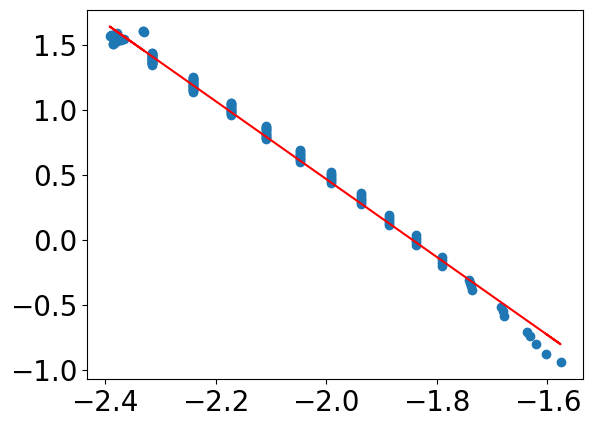

In [43]:
#FOR THE NO SLIP no growth difference

import matplotlib.pyplot as plt
from scipy import stats

x = np.array(X)
y = np.array(Y)
#print(x)
xlog = np.log( (1 - x) / 2)
res = stats.linregress(xlog, np.log(y))
plt.scatter(xlog,np.log(y))
plt.plot(xlog, xlog*res.slope + res.intercept, 'r')

print(res.slope)

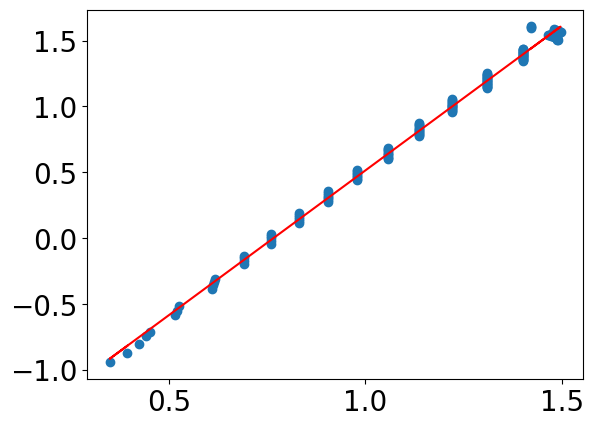

In [44]:
import matplotlib.pyplot as plt
from scipy import stats
x = np.array(X)
y = np.array(Y)
xlog = np.log(x / (1 - x))
res = stats.linregress(xlog, np.log(y))
plt.scatter(xlog,np.log(y))
plt.plot(xlog, xlog*res.slope + res.intercept, 'r')

#plt.plot( res.slope * np.log(y) + res.intercept, np.log(y),'r')
#plt.scatter(X,Y)

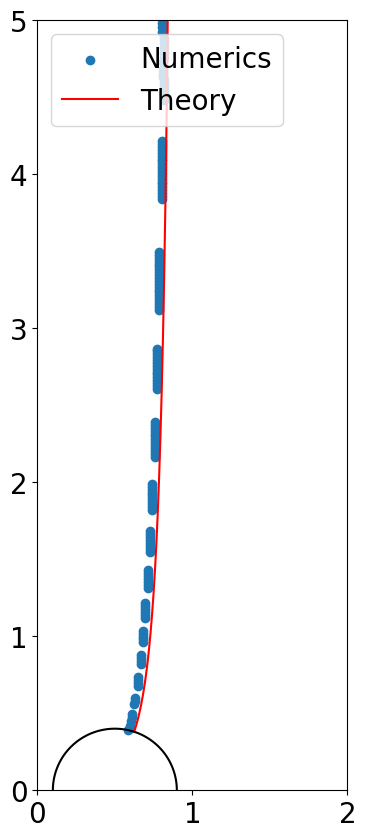

In [55]:
#Slip boundary conditions, nonzero growth rate difference

import matplotlib
matplotlib.rcParams.update({'font.size': 20})
#plt.rcParams['text.usetex'] = True
#plt.rcParams.update({
#"text.usetex": True,
#"font.family": "sans-serif",
#"font.sans-serif": ["Helvetica"]})
R = 0.4
xcenter = 0.5
x0  = 0.25 + 0.75*xcenter
y0 = np.sqrt(R**2 - (x0 - xcenter)**2)

C = y0 * (1 - x0)**3
xx = np.arange(1000)/1000 * (1 - x0) + x0
xxx = np.arange(100000)/100000 * 2 * R + xcenter - R
yyy = np.sqrt(R**2 - (xxx - xcenter)**2)
fig, ax = plt.subplots(figsize=(4, 10))#, tight_layout=True)
ax.scatter(x,y, label = 'Numerics')
ax.plot(xx , C/(1 - xx)**3, 'r',label = 'Theory')
ax.plot(xxx,yyy,'k')
plt.ylim(0,5)
plt.xlim(0,2)
#ax.set_xlabel(r'', fontsize = 20)
#ax.set_ylabel('D', fontsize=20, rotation = 0)

ax.legend(loc=2, prop={'size': 20})

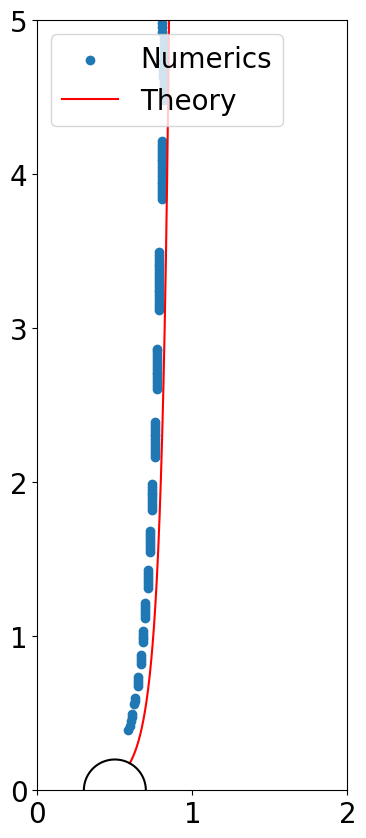

In [52]:
#Slip boundary conditions, nonzero growth rate difference

import matplotlib
matplotlib.rcParams.update({'font.size': 20})
#plt.rcParams['text.usetex'] = True
#plt.rcParams.update({
#"text.usetex": True,
#"font.family": "sans-serif",
#"font.sans-serif": ["Helvetica"]})
R = 0.2
k1 = 1.2
k2 = 0.8
rel = 1 / ( (k1 - k2) / (k1 + k2) * 2)
x0  = (np.sqrt(rel**2 + 1) - (rel - 1)) / 2
y0 = np.sqrt(R**2 - (x0 - 0.5)**2)
C = y0 * ((1 - x0) / x0)**rel
xx = np.arange(1000)/1000 * (1 - x0) + x0
xxx = np.arange(100000)/100000 * 2 * R + 0.5 - R
yyy = np.sqrt(R**2 - (xxx - 0.5)**2)
fig, ax = plt.subplots(figsize=(4, 10))#, tight_layout=True)
ax.scatter(x,y, label = 'Numerics')
ax.plot(xx , C*(xx/ (1 - xx))**rel, 'r',label = 'Theory')
ax.plot(xxx,yyy,'k')
plt.ylim(0,5)
plt.xlim(0,2)
#ax.set_xlabel(r'', fontsize = 20)
#ax.set_ylabel('D', fontsize=20, rotation = 0)

ax.legend(loc=2, prop={'size': 20})

In [ ]:
plt.scatter(x,y)
k1 = 1.2
k2 = 0.8
rel_av = 1 / ( (k1 - k2) / (k1 + k2) * 2)
rel_min = 1 / ((k1 - k2) / k2)
R = 0.2
x0_av = (np.sqrt(rel_av**2 + 1) - (rel_av - 1)) / 2
x0_min = (np.sqrt(rel_min**2 + 1) - (rel_min - 1)) / 2
y0_av = np.sqrt(R**2 - (x0_av - 0.5)**2)
y0_min = np.sqrt(R**2 - (x0_min - 0.5)**2)
C_av = y0_av * ((1 - x0_av) / x0_av)**rel_av
C_min = y0_min * ((1 - x0_min) / x0_min)**rel_min

plt.plot(x , C_av*(x/ (1 - x))**rel_av, 'r')
plt.plot(x , C_min*(x/ (1 - x))**rel_min, 'k')

In [ ]:
from scipy import stats
res = stats.linregress(xlog, np.log(y))
print(res)

In [ ]:
(np.sqrt(2.5**2 + 1) - 1.5) / 2 

In [ ]:
print(x)

In [ ]:
A= [8007, 1274,  404,  171,   73,   34,   14,   10,    6,    2,    3,    2]

plt.plot(np.log(A),'bo')
ind = (np.arange(5) + 1)**3
plt.plot(np.log(A[0] / ind),'r')


In [ ]:
808 / 33

In [25]:
eps = 0.4 *2 / (1.44*1.2 + 0.56*0.8)
q = 0.1
z = (np.sqrt(1 + (2 + 6*q)*eps**2) - 1) / eps
print(z)

0.4420246678354674


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Ly = 100
Lx = 50
wall_length = 390-378

b_nominal = 0.8
bh = b_nominal*0.8; bl = bh*0.7
bavg = (bh+bl)/2; eps = bh-bl
bavg = bl
print(bavg/eps)
x0= 17;xf = 45
Lx = 85

def boundary(x,bavg,eps,x0):
    x = x/Lx
    x0 = x0/Lx
    C1 = -np.log(wall_length)+bavg/eps*np.log(x0/(1-x0))
    y = (x/(1-x))**(bavg/eps)*np.exp(-C1)
    
    return y

x = np.arange(x0,xf)
image = 'Panflute-bottom-shape.png'
image = 'example_panfltes.png'
img = np.asarray(Image.open(image))
plt.imshow(img)
y = boundary(x,bavg,eps,x0)
y = 390-y
plt.plot(x,y,'r',linewidth=2)
plt.show()
